In [1]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import patches
import json

In [3]:
labels = json.load(open(f"../out/labels.json"))

In [4]:
len(labels)

100

In [3]:
rand_id = list(labels[97].keys())[0]

In [4]:
# import image
background = cv2.imread(f"../out/images/image_{rand_id}.png")
background_mask  = cv2.imread(f"../out/masks/mask_{rand_id}.png")

In [5]:
background_npy = np.array(background)
background_mask_npy = np.array(background_mask)

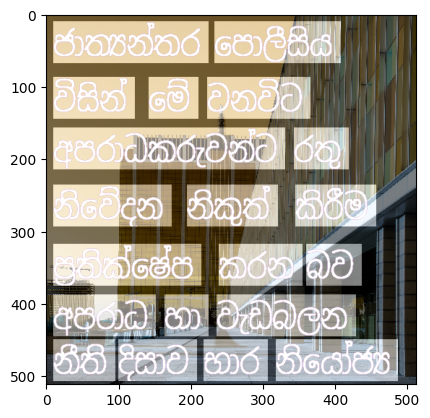

In [6]:
# plot image with bbox
plt.imshow(background_npy)
plt.imshow(background_mask_npy, alpha=0.5)
plt.show()

In [14]:
def plot_bbox(image_path,x_upper_left:list,y_upper_left:list,width:list,height:list,text:list):
    image = np.array(Image.open(image_path), dtype=np.uint8)
    fig,ax = plt.subplots(1)
    ax.imshow(image)
    for i in range(len(x_upper_left)):
        rect = patches.Rectangle((x_upper_left[i],y_upper_left[i]),width[i],height[i],linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        plt.text(x_upper_left[i], y_upper_left[i], text[i], fontsize=12, color="white")
    plt.show()

In [15]:
labels_sample = labels[97][rand_id]
text = [label['text'] for label in labels_sample]
x_upper_left = [label['x'] for label in labels_sample]
y_upper_left = [label['y'] for label in labels_sample]
width = [label['width'] for label in labels_sample]
height = [label['height'] for label in labels_sample]

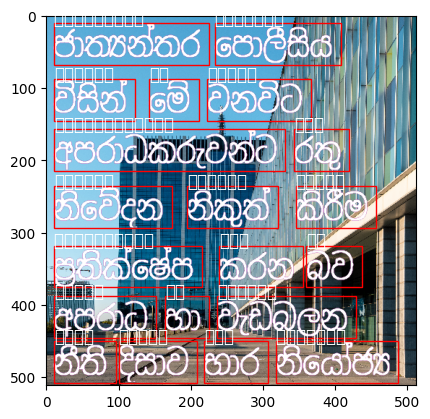

In [16]:
plot_bbox(f"../out/images/image_{rand_id}.png", x_upper_left, y_upper_left, width, height, text)